# Interest Rates: Are they the Crystal Ball?
This project will be taking a deeper dive in looking at interest rates as possible a leading or lagging indicator in regards to the technology sector and the housing market. The variable will be compared at the same timeframe to determine initially if there are in correlations. Secondly, determine is there a riable trading stategy based on the results.

In [1]:
# Import the libraries and dependencies
import os
import pandas as pd
import hvplot.pandas
import numpy as np
import yfinance as yf
from matplotlib import ticker
import pathlib as Path
import matplotlib.pyplot as plt
import seaborn as sns

import holoviews as hv
hv.extension('bokeh')
from bokeh.models.formatters import NumeralTickFormatter
formatter = NumeralTickFormatter(format="0,0")

# Set matplotlib to display plots inline
%matplotlib inline


### Interest Rate Data

In [2]:
# Read in Interest Data CSV
interest_rate_df = pd.read_csv(("Resources/DFF.csv"),
index_col="DATE",
parse_dates=True,
infer_datetime_format=True                             
)

# Rename dataframe column
interest_rate_df = interest_rate_df.rename(columns={'DATE':'Date', 'DFF':'Discount Fed Funds'}) 

#Review the DataFrame
display(interest_rate_df.head())

C:\Users\b_key\AppData\Local\Temp\ipykernel_28568\2085700090.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  interest_rate_df = pd.read_csv(("Resources/DFF.csv"),


,Discount Fed Funds
DATE,
2018-11-24,2.2
2018-11-25,2.2
2018-11-26,2.2
2018-11-27,2.2
2018-11-28,2.2


In [3]:
# Plot the Interest rate dataframe for the designated dataframe
interest_rate_df.loc["2020-01-01" : "2023-10-31"].hvplot(title="Historical Interest Rates")

:Curve   [DATE]   (Discount Fed Funds)

### Index and Stock Analysis

In [4]:
# Import Nasdaq Index Historical data and define timeframe for the Nasdaq Index
nasdaq_df = yf.download(["^IXIC"],
                    start='2020-01-01',
                    end='2023-10-31',
                    progress=False,
                    )

# Drop columns (Open,High, Low, Adj Close)
nasdaq_df.drop(['Open','High','Low','Adj Close'], axis=1, inplace=True)

# Drop Dataframe NaN values
nasdaq_df.dropna()

# Review the Nasdaq historical data
display(nasdaq_df.head())
display(nasdaq_df.tail())

,Close,Volume
Date,,
2020-01-02,9092.190430,2862700000
2020-01-03,9020.769531,2586520000
2020-01-06,9071.469727,2810450000
2020-01-07,9068.580078,2381740000
2020-01-08,9129.240234,2472620000


,Close,Volume
Date,,
2023-10-24,13139.870117,4604720000
2023-10-25,12821.219727,4599850000
2023-10-26,12595.610352,4894900000
2023-10-27,12643.009766,4172100000
2023-10-30,12789.480469,4149320000


In [5]:
# Plot the Nasdaq Index Historical Close Price
nasdaq_df['Close'].hvplot(title="Nasdaq Index Historical Price", color='green', ylabel='Close').opts(yformatter=formatter)

:Curve   [Date]   (Close)

In [6]:
# Plot the Nasdaq Index Historical Volume
nasdaq_df['Volume'].hvplot(title="Nasdaq Index Historical Volume", ylabel='Volume').opts(yformatter=formatter)

:Curve   [Date]   (Volume)

In [7]:
# Correlations between Nasdaq Index Historical Closing Price and Volume
nasdaq_df[["Close", "Volume"]].corr()

,Close,Volume
Close,1.00000,0.27113
Volume,0.27113,1.00000


In [8]:
# Plot the relationship between the Nasdaq Index Close Price and Nasdaq Index Volume
nasdaq_df.hvplot(kind='scatter', title= 'Nasdaq Close vs Nasdaq Volume',x='Close', y='Volume').opts(yformatter=formatter)

:Scatter   [Close]   (Volume)

In [9]:
# Calculate the correlation of Nasdaq Index and DFF
correlation = nasdaq_df.corr()

<Axes: >

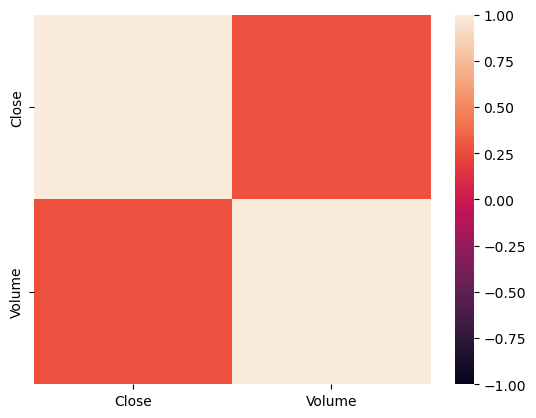

In [10]:
#Visualize correlationsusing the `heatmap` function from the seaborn library  
sns.heatmap(correlation, vmin=-1, vmax=1)

In [11]:
# Select five stocks from the Nasdaq Index to evaluate (Apple, Google, Amazon, Meta, and NVIDIA)
nasdaq_ticks_df = yf.download(["AAPL", "GOOG", "AMZN", "META","NVDA"],
                          start='2020-01-01',
                          end='2023-10-31',
                          progress=False,
                             )

# Drop columns (Open,High, Low, Adj Close)
nasdaq_ticks_df.drop(['Open','High','Low','Adj Close'], axis=1, inplace=True)

# Drop Dataframe NaN values
nasdaq_ticks_df.dropna()

#Display Nasdaq stocks data
display(nasdaq_ticks_df.head())

Close                                                  Volume  \
                 AAPL       AMZN       GOOG        META       NVDA       AAPL   
Date                                                                            
2020-01-02  75.087502  94.900497  68.368500  209.779999  59.977501  135480400   
2020-01-03  74.357498  93.748497  68.032997  208.669998  59.017502  146322800   
2020-01-06  74.949997  95.143997  69.710503  212.600006  59.264999  118387200   
2020-01-07  74.597504  95.343002  69.667000  213.059998  59.982498  108872000   
2020-01-08  75.797501  94.598503  70.216003  215.220001  60.095001  132079200   

                                                    
                AMZN      GOOG      META      NVDA  
Date                                                
2020-01-02  80580000  28132000  12077100  23753600  
2020-01-03  75288000  23728000  11188400  20538400  
2020-01-06  81236000  34646000  17058900  26263600  
2020-01-07  80898000  30054000  14912400  31485600  
2020-01-08  70160000  30560000  13475000  27710800

In [12]:
# Plot Top Five Nasdaq Stocks
nasdaq_ticks_df['Close'].hvplot(title="Tech Stocks Historical Close Price", ylabel='Close')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [13]:
# Plot Top Five Nasdaq Volume
nasdaq_ticks_df['Volume'].hvplot(title="Tech Stocks Historical Volume", ylabel='Volume').opts(yformatter=formatter)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Analysis Data Correlations

In [14]:
# Combine Nasdaq dataframe with Interest rate dataframe using Concat functions
#Drop NaN values
df_mix = pd.concat([nasdaq_df, interest_rate_df], axis="columns", join="inner")

#Drop Volume column from dataframe
df_mix.drop('Volume', axis=1, inplace=True)

#Drop NaN values from dataframe
df_mix.dropna()

# Review Dataframe
df_mix.head()

,Close,Discount Fed Funds
2020-01-02,9092.190430,1.55
2020-01-03,9020.769531,1.55
2020-01-06,9071.469727,1.55
2020-01-07,9068.580078,1.55
2020-01-08,9129.240234,1.55


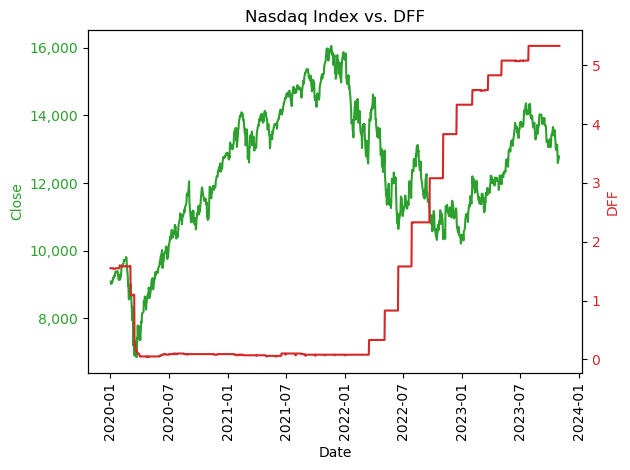

In [15]:
import matplotlib as mpl

#Create overlay plot of historical Nasdaq data and Interest Rate data
# Set plots to data1 and data 2 for plotting
data1 = nasdaq_df['Close']
data2 = interest_rate_df.loc["2020-01-01" : "2023-10-31"]

fig, ax1 = plt.subplots()

# Create set of parameters for initial x-axis and y-axis
color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_tick_params(rotation=90, labelsize=10)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Create second axes that shares the same x-axis
ax2 = ax1.twinx() 

# Create next set of parameters for second y-axis
color = 'tab:red'
ax2.set_ylabel('DFF', color=color)
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Nasdaq Index vs. DFF')

# Plot graph
fig.tight_layout()  
plt.show()

In [16]:
# Correlations between Nasdaq Closing Price and Interest Rates
df_mix.corr()

,Close,Discount Fed Funds
Close,1.000000,-0.061101
Discount Fed Funds,-0.061101,1.000000


In [17]:
# Plot the relationship between the Nasdaq Index Close Price and DFF
df_mix.hvplot(kind='scatter', title='Nasdaq Index and DFF Scatter Plot', x='Close', y='Discount Fed Funds')

:Scatter   [Close]   (Discount Fed Funds)

In [18]:
# Calculate the correlation of Nasdaq Index and DFF
correlation2 = df_mix.corr()

<Axes: >

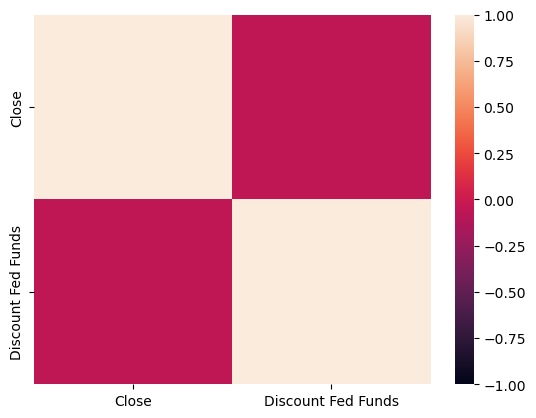

In [19]:
#Visualize correlationsusing the `heatmap` function from the seaborn library  
sns.heatmap(correlation2, vmin=-1, vmax=1)

Was there correlation between between Nasdaq Index and Discount Fed Funds?

Based on the heatmap, there does not seem to be a significant correlation between the Nasdaq Index and Discount Fed Funds.

### Housing Market Analysis

In [20]:
# Read in Housing Data CSV
housing_data_df = pd.read_csv("Resources/us_home_data.csv", index_col="DateTime", infer_datetime_format=True, parse_dates=True)

#Review the DataFrame
housing_data_df.head()

C:\Users\b_key\AppData\Local\Temp\ipykernel_28568\2107668189.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  housing_data_df = pd.read_csv("Resources/us_home_data.csv", index_col="DateTime", infer_datetime_format=True, parse_dates=True)


,Country,Category,Value,Frequency,HistoricalDataSymbol,LastUpdate
DateTime,,,,,,
1968-01-31,United States,Existing Home Sales,1420,Monthly,UNITEDSTAEXIHOMSAL,2013-10-29T14:38:00
1968-02-29,United States,Existing Home Sales,1500,Monthly,UNITEDSTAEXIHOMSAL,2013-10-29T14:38:00
1968-03-31,United States,Existing Home Sales,1550,Monthly,UNITEDSTAEXIHOMSAL,2013-10-29T14:38:00
1968-04-30,United States,Existing Home Sales,1470,Monthly,UNITEDSTAEXIHOMSAL,2013-10-29T14:38:00
1968-05-31,United States,Existing Home Sales,1510,Monthly,UNITEDSTAEXIHOMSAL,2013-10-29T14:38:00


In [21]:
#Clean up dataframe
# Drop columns and NaN values
housing_data_df.drop(["Country","Category","Frequency","HistoricalDataSymbol","LastUpdate"], axis=1, inplace=True)

# Drop Dataframe NaN values
housing_data_df.dropna()

# Review dataframe
housing_data_df 

,Value
DateTime,
1968-01-31,1420
1968-02-29,1500
1968-03-31,1550
1968-04-30,1470
1968-05-31,1510
...,...
2023-06-30,4160
2023-07-31,4070
2023-08-31,4040


In [22]:
# Set timeframe for home sold between January 1, 2020 - October 31, 2023
home_sold_data_df = housing_data_df.loc["2020-01-01" : "2023-10-31"]

#Rename Column: change value to Home Sold
home_sold_data_df.rename(columns = {'Value':'Home Sold'}, inplace = True)

#Review dataframe
home_sold_data_df.head()

C:\Users\b_key\AppData\Local\Temp\ipykernel_28568\3771129835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_sold_data_df.rename(columns = {'Value':'Home Sold'}, inplace = True)


,Home Sold
DateTime,
2020-01-31,5400
2020-02-29,5630
2020-03-31,5340
2020-04-30,4460
2020-05-31,4090


In [23]:
# Plot the Home Sold Data
home_sold_data_df.hvplot.bar(title="Historical Homes Sold", 
                             xlabel='Date', 
                             ylabel="Number of Homes Sold (per 1000's)",
                            ).opts(yformatter=formatter, xrotation=90, fontsize={'ylabel':8})

:Bars   [DateTime]   (Home Sold)

In [24]:
# Combine Nasdaq dataframe with Interest rate dataframe using Concat functions
#Drop NaN values
df_combine = pd.concat([home_sold_data_df, interest_rate_df], axis="columns", join="inner")

#Drop NaN values from dataframe
df_combine.dropna()

# Review Dataframe
df_combine.head()

,Home Sold,Discount Fed Funds
2020-01-31,5400,1.59
2020-02-29,5630,1.58
2020-03-31,5340,0.08
2020-04-30,4460,0.05
2020-05-31,4090,0.05


In [25]:
# Correlations between Nasdaq Closing Price and Interest Rates
df_combine.corr()

,Home Sold,Discount Fed Funds
Home Sold,1.000000,-0.848075
Discount Fed Funds,-0.848075,1.000000


In [26]:
# Plot the relationship between the Nasdaq Index Close Price and DFF
df_combine.hvplot(kind='scatter',title='Homes Sold and DFF Scatter Plot', x='Home Sold', y='Discount Fed Funds')

:Scatter   [Home Sold]   (Discount Fed Funds)

In [27]:
# Calculate the correlation of Nasdaq Index and DFF
correlation3 = df_combine.corr()

<Axes: >

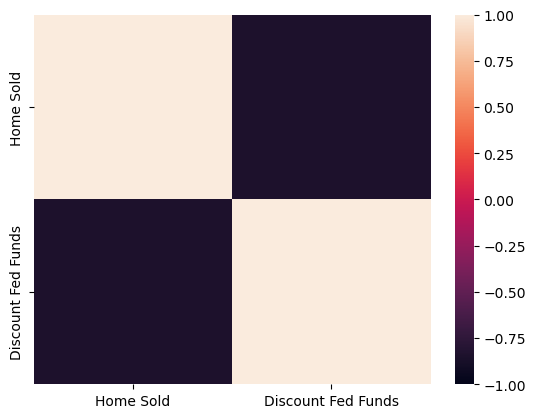

In [33]:
#Visualize correlationsusing the `heatmap` function from the seaborn library  
sns.heatmap(correlation3, vmin=-1, vmax=1)

Was there correlation between between Nasdaq Index and Homes Sold?

Based on the heatmap, there does not seem to be a significant correlation between the Homes Sold and Discount Fed Funds.

## Summary

In conclusion, the results showed that there was a correlation between homes sold and the Discount Fed Funds Rate. And maybe Discount Fed Funds Rate could serve as a leading indicator for the housing market. However, it appeared that the Discount Fed Funds Rate did not have a correlation between the Nasdaq. More research should be conducted to see if trends continue in different timeframes.  In addition, individual stock evaluation should be evaluated in regards to the Discount Fed Funds Rate.